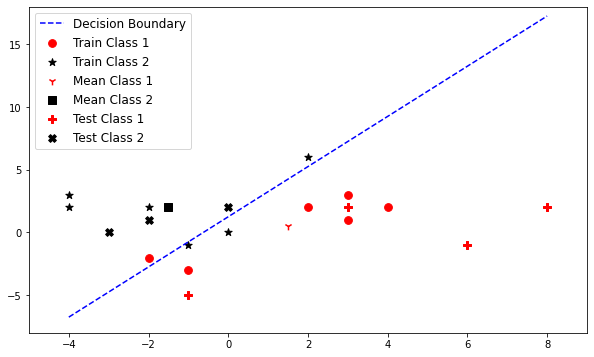

Accuracy :  85.71


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv("train.txt", sep = " ", header = None)

train = dataset.iloc[:, :].values

dataset = pd.read_csv("test.txt", sep = " ", header = None)

test = dataset.iloc[:, :].values

myFig = plt.figure(figsize=[10,6])

plt.scatter(list(train[i][0] for i in range(len(train)) if train[i][2] == 1), 
            list(train[i][1] for i in range(len(train)) if train[i][2] == 1), 
            color = "red", marker = 'o', label = "Train Class 1", s = 60)

plt.scatter(list(train[i][0] for i in range(len(train)) if train[i][2] == 2), 
            list(train[i][1] for i in range(len(train)) if train[i][2] == 2), 
            color = "black", marker = '*', label = "Train Class 2", s = 60)

mean_1 = np.array([np.mean(list(train[i][0] for i in range(len(train)) if train[i][2] == 1)), 
          np.mean(list(train[i][1] for i in range(len(train)) if train[i][2] == 1))])

plt.scatter(mean_1[0], mean_1[1], color = "red", marker = '1', label = "Mean Class 1", s = 60)

mean_2 = np.array([np.mean(list(train[i][0] for i in range(len(train)) if train[i][2] == 2)), 
          np.mean(list(train[i][1] for i in range(len(train)) if train[i][2] == 2))])

plt.scatter(mean_2[0], mean_2[1], color = "black", marker = 's', label = "Mean Class 2", s = 60)

plt.xlim(-5, 9)
plt.ylim(-8, 18)

prediction = []

for i in range(len(test)):
  x1 = test[i][0]
  x2 = test[i][1]

  g1_x = (x1*mean_1[0] + x2*mean_1[1]) - 0.5 * (mean_1[0]*mean_1[0] + mean_1[1]*mean_1[1])
  g2_x = (x1*mean_2[0] + x2*mean_2[1]) - 0.5 * (mean_2[0]*mean_2[0] + mean_2[1]*mean_2[1])

  if g1_x > g2_x:
    prediction.append(1)
  else:
    prediction.append(2)

plt.scatter(list(test[i][0] for i in range(len(test)) if prediction[i] == 1), 
            list(test[i][1] for i in range(len(test)) if prediction[i] == 1),
            color = "red", marker = "P", label = "Test Class 1", s = 60)

plt.scatter(list(test[i][0] for i in range(len(test)) if prediction[i] == 2), 
            list(test[i][1] for i in range(len(test)) if prediction[i] == 2),
            color = "black", marker = "X", label = "Test Class 2", s = 60)  

m = mean_1 - mean_2 
c = 0.5 * ((mean_1[0]*mean_1[0] + mean_1[1]*mean_1[1]) - (mean_2[0]*mean_2[0] + mean_2[1]*mean_2[1]))

plt.plot(list(i for i in range(-4, 9)), list((-m[0]*j + c)/m[1] for j in range(-4, 9)),
            color = "blue", linestyle = "dashed", label = "Decision Boundary", markersize = 16) 

plt.legend(loc = "best", fontsize = 12)
plt.show()

accuracy = 0
for i in range(len(test)):
  if test[i][2] == prediction[i]:
    accuracy = accuracy + 1
accuracy = (accuracy / len(test)) * 100   
print("Accuracy : ", "{:.2f}".format(accuracy))

In [11]:
from google.colab import files
myFig.savefig("Assignment1.png")
files.download("Assignment1.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>